# Machine Learning and Computational Statistics

## Homework 7 - Ilias Katsampalos

# Exercise 1

We have the langragian function
$$ L(P_1, P_2, ..., P_m) = \sum_{i=1}^{n}\sum_{j=1}^{m} P(j|x_i)ln(P_j) + \lambda (\sum_{j=1}^{m} P_j - 1)$$
Taking the gradient and settin to 0 we have

$$
\begin{bmatrix}
\frac{\partial L(P_1, P_2, ..., P_m)}{\partial P_1}\\
\frac{\partial L(P_1, P_2, ..., P_m)}{\partial P_2} \\
\vdots \\
\frac{\partial L(P_1, P_2, ..., P_m)}{\partial P_j} \\
\end{bmatrix} =
\begin{bmatrix}
\sum_{i=1}^{N}\frac{p(1|x_i)}{p_1} + \lambda\\
\sum_{i=1}^{N}\frac{p(2|x_i)}{p_2} + \lambda\\
\vdots \\
\sum_{i=1}^{N}\frac{p(j|x_i)}{p_j} + \lambda\\
\end{bmatrix} =
\begin{bmatrix}
0\\
0\\
\vdots \\
0\\
\end{bmatrix} 
\Rightarrow \sum_{i=1}^{N}\frac{p(j|x_i)}{p_j} + \lambda = 0 
\Rightarrow p_j = - \sum_{i=1}^{N}\frac{p(j|x_i)}{\lambda}
$$

Substituting into our  constraint $\sum_{j=1}^{m}P_j = 1$ and solving for λ we have:
$$
\begin{align*}
    -\frac{1}{\lambda}\sum_{j=1}^{m}\sum_{i=1}^{n}p(j|x_i) = 1
    \Rightarrow \lambda = -\sum_{j=1}^{m}\sum_{i=1}^{n}p(j|x_i)
\end{align*}
$$

Subsituting back to the expression of $P_j$:
$$
\begin{align*}
    P_j &= \frac{\sum_{i=1}^{n}P(j|x_i)}{\sum_{j=1}^{m}\sum_{i=1}^{n}p(j|x_i)} \\
    \Rightarrow P_j &= \frac{\sum_{i=1}^{n}P(j|x_i)}{\sum_{i=1}^{n}\sum_{j=1}^{m}p(j|x_i)} \\
    \Rightarrow P_j &= \frac{\sum_{i=1}^{n}P(j|x_i)}{\sum_{i=1}^{n}1} \\
    \Rightarrow P_j &= \frac{\sum_{i=1}^{n}P(j|x_i)}{N} \\
\end{align*}
$$

# Exercise 2

We have the following maximization:
$$
\begin{align*}
    &argmax_{\mu_j} \sum_{i=1}^{N}p(j|x_i)ln(p(x_i|j;\mu_j)) \\
    &\Rightarrow argmax_{\mu_j} \sum_{i=1}^{N}p(j|x_i)ln\bigg[
    \frac{1}{(2\pi)^{l/2}|\Sigma|^{1/2}} exp\big(-\frac{1}{2}(x_i - \mu_j)^T \Sigma^{-1} (x_i - \mu_j)\big)
    \bigg] \\
    &\Rightarrow argmax_{\mu_j} \sum_{i=1}^{N}p(j|x_i) \bigg[
    -\frac{l}{2}ln(2\pi) - \frac{1}{2}|\Sigma| -\frac{1}{2}(x_i - \mu_j)^T \Sigma^{-1} (x_i - \mu_j)\bigg]\\
\end{align*}
$$

Taking the grad and setting it to 0
$$
\begin{align*}
   &\nabla \mu_j = \sum_{i=1}^{N}p(j|x_i) \Sigma^{-1} (x_i - \mu_j) = 0 \\
   &\Rightarrow \sum_{i=1}^{N}p(j|x_i) (x_i - \mu_j) = 0 \\
   &\Rightarrow \sum_{i=1}^{N}p(j|x_i)x_i - \sum_{i=1}^{N}p(j|x_i)\mu_j = 0 \\
   &\Rightarrow \mu_j = \frac{\sum_{i=1}^{N}p(j|x_i)x_i}{\sum_{i=1}^{N}p(j|x_i)} \\
\end{align*}
$$

# Exercise 3

In [24]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

#create dataframes for X1, X2 for faster visualization
df1 = pd.DataFrame(X1, columns=['feature_1','feature_2','feature_3','feature_4'])
df2 = pd.DataFrame(X2, columns=['feature_1','feature_2','feature_3','feature_4'])

#datapoints for which we wish to estimate the density
x1 = np.array([
    [2.01, 2.99, 3.98, 5.02]
    ,[20.78, -15.26, 19.38, -25.02]
    ,[3.08, 3.88, 4.15, 6.02]
])

x2 = np.array([
    [0.05, 0.15, -0.12, -0.08]
    ,[7.18, 7.98, 9.12, 9.94]
    ,[3.48, 4.01,4.55, 4.96]
    ,[20.78, -15.26, 19.38, -25.02]
])

### a) For X1
We can start by looking at the marginal distributions as well as pair joint distributions

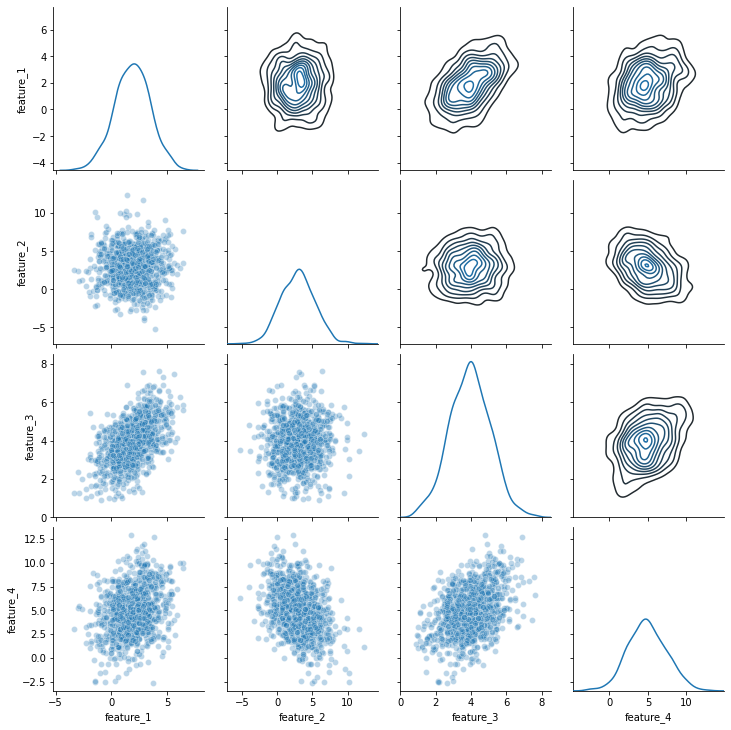

In [37]:
import seaborn as sns
g = sns.PairGrid(df1)
g.map_diag(sns.distplot, hist=False)
g.map_lower(sns.scatterplot, alpha=0.3)
g.map_upper(sns.kdeplot)
plt.show()

we can observe some normality, either in the marginal distributions as well as the pairplot joints. We could approximate the joint distribution with a normal distribution

In [59]:
#calculate the means and the covariance matrix of the joint distribution
means_1 = df1.mean()
cov_1 = ((df1 - means_x1).T @ (df1 - means_x1)) / (len(df1)-1)

from scipy.stats import multivariate_normal
pdf_1 = lambda x: multivariate_normal(means_1, cov_1).pdf(x)

We can sample some datapoints from this distribution and plot them on top of our sample, to make sure that our estimates are correct

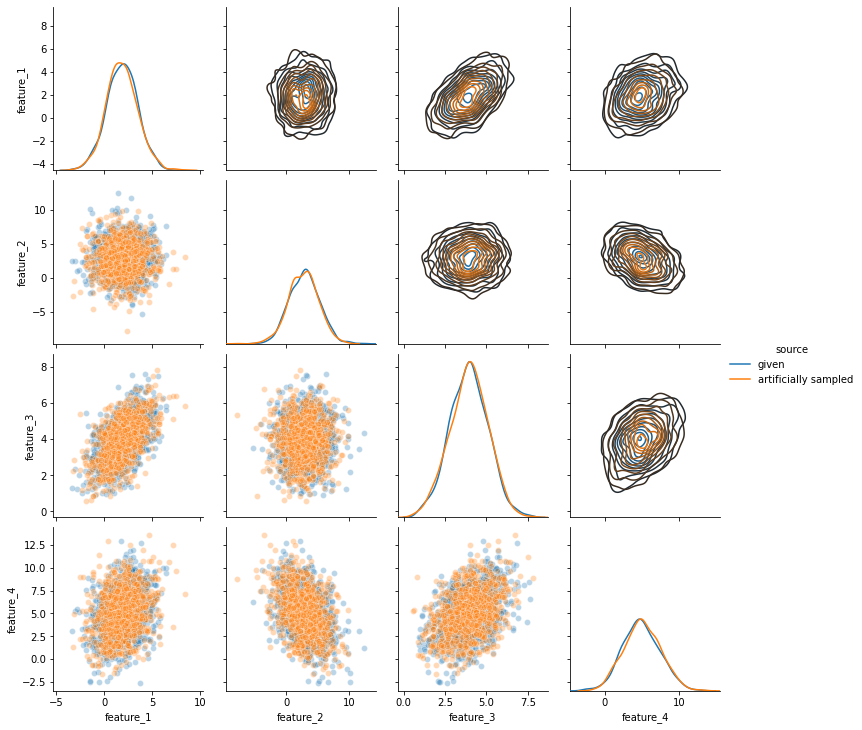

In [74]:
sample_1 = np.random.multivariate_normal(means_1, cov_1, 1000)
sample_1 = pd.DataFrame(sample_1, columns = ['feature_1','feature_2','feature_3','feature_4'])
sample_1['source'] = 'artificially sampled'

#add an additional column to X1 stating each origin
df1['source'] = 'given'

g_comp = sns.PairGrid(pd.concat([df1, sample_1]), hue='source')
g_comp.map_diag(sns.distplot, hist=False)
g_comp.map_lower(sns.scatterplot, alpha=0.3)
g_comp.map_upper(sns.kdeplot)
g_comp.add_legend()
plt.show()

Based on the the similarities of our sampled data from a normal distribution and the data that was given, we could say that the the data are normally distributed

In [75]:
#calculate the datapoints as requested
for x in x1:
    print('p({}) = {}'.format(x,pdf_1(x)))

p([2.01 2.99 3.98 5.02]) = 0.0033722995871208594
p([ 20.78 -15.26  19.38 -25.02]) = 2.050434726663058e-206
p([3.08 3.88 4.15 6.02]) = 0.0019492504646261076


## b)
We will follow the same approach for X2

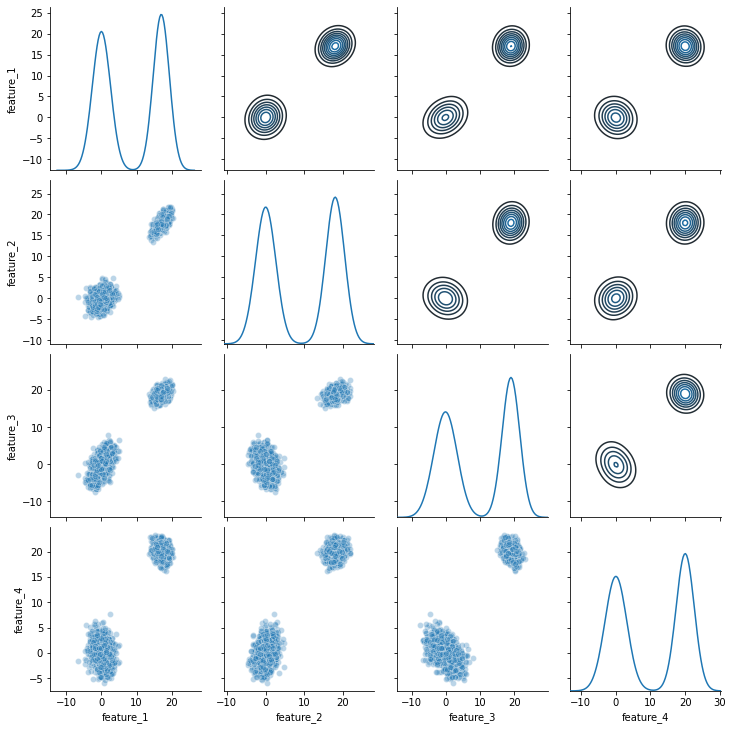

In [76]:
g = sns.PairGrid(df2)
g.map_diag(sns.distplot, hist=False)
g.map_lower(sns.scatterplot, alpha=0.3)
g.map_upper(sns.kdeplot)
plt.show()

Here we can clearly observe 2 different distributions which seem to be normal. We can use a Gaussian Mixture model to approximate them

In [81]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2)
gm.fit(X2)

GaussianMixture(n_components=2)

We will sample a few data datapoints and plot them together with the given dataset

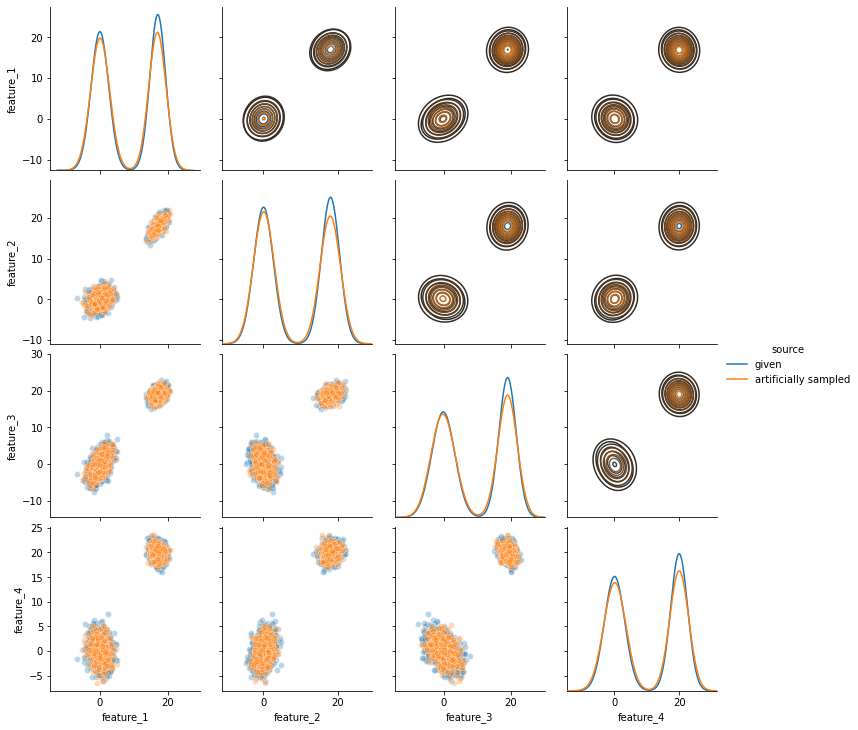

In [87]:
sample_2 = gm.sample(1000)
sample_2 = pd.DataFrame(sample_2[0], columns = ['feature_1','feature_2','feature_3','feature_4'])
sample_2['source'] = 'artificially sampled'

df2['source'] = 'given'

g_comp = sns.PairGrid(pd.concat([df2, sample_2]), hue='source')
g_comp.map_diag(sns.distplot, hist=False)
g_comp.map_lower(sns.scatterplot, alpha=0.3)
g_comp.map_upper(sns.kdeplot)
g_comp.add_legend()
plt.show()

Seeing that the artificially sampled data as well as the given data are quite similar. Now we will proceed with the predictions. We know that $$p(x) = \sum_{j=1}^{m}p(x|\omega_j)\ \omega_j$$, so we will need to figure out the conditional probabilities of each data point given that it belonged to the respective class, as well as the marginal probability of each class

In [109]:
#We will define 2 gaussians
p_x_given_omega1 = lambda x: multivariate_normal(gm.means_[0], gm.covariances_[0]).pdf(x)
p_x_given_omega2 = lambda x: multivariate_normal(gm.means_[1], gm.covariances_[1]).pdf(x)

p_x = lambda x: p_x_given_omega1(x) * gm.weights_[0] + p_x_given_omega2(x)*gm.weights_[1]

In [111]:
# Then we will calculate p(x) for the datapoints requested
for x in x2:
    print('p({}) = {}'.format(x,p_x(x)))

p([ 0.05  0.15 -0.12 -0.08]) = 0.0015783109508059313
p([7.18 7.98 9.12 9.94]) = 1.804889303352233e-24
p([3.48 4.01 4.55 4.96]) = 8.692618030847381e-09
p([ 20.78 -15.26  19.38 -25.02]) = 2.0603418613041784e-102


# Exercise 4

Since the 3 classes are equiprobable we have:
$$P(\omega_1) = P(\omega_2) = P(\omega_3) = \frac{1}{3}$$

Additionally, since the 3 classes are normally distributed we have:
$$
P(x|\omega_j) = \frac{1}{2\pi} exp(-\frac{1}{2}(x-\mu_j)^T (x-\mu_j))
$$

In [42]:
from scipy.stats import multivariate_normal
#define p_ω
p_omega = [1/3, 1/3, 1/3]

#define our distributuions
mu_1 = [0,0]
mu_2 = [0,3]
mu_3 = [3,0]
p_x_given_omega_1 = lambda x: multivariate_normal(mu_1, np.identity(2)).pdf(x)
p_x_given_omega_2 = lambda x: multivariate_normal(mu_2, np.identity(2)).pdf(x)
p_x_given_omega_3 = lambda x: multivariate_normal(mu_3, np.identity(2)).pdf(x)

The datapoints that we need to classify are

In [43]:
x1 = [1,1]
x2 = [1,2]
x3 = [2,1]

We will assign to a class based on the posterior probability $P(\omega_j|x)$ which according to the Bays' rule:
$$P(\omega_j|x) = \frac{P(x|\omega_j)P(\omega_j)}{\sum_{q=1}^{m}P(x|\omega_q)P(\omega_q)}$$
For each datapoint we will need to calculate 3 different posteriors
* $P(\omega_1|x)$
* $P(\omega_2|x)$
* $P(\omega_3|x)$

We will also define $p(x) = \sum_{j=1}^{m}P(x|\omega_j)P(\omega_j)$

In [44]:
p_x = lambda x: p_x_given_omega_1(x)*p_omega[0] + p_x_given_omega_2(x)*p_omega[1] + p_x_given_omega_3(x)*p_omega[2]

For $x_1$ we have

In [45]:
# we calculate the three posteriors
p_omega_1_given_x1 = p_x_given_omega_1(x1) * p_omega[0] / p_x(x1)
p_omega_2_given_x1 = p_x_given_omega_2(x1) * p_omega[1] / p_x(x1)
p_omega_3_given_x1 = p_x_given_omega_3(x1) * p_omega[2] / p_x(x1)
print('P(ω1|x1) = {}, P(ω2|x1) = {}, P(ω3|x1) = {}'.format(p_omega_1_given_x1, p_omega_2_given_x1, p_omega_3_given_x1))

P(ω1|x1) = 0.6914384540362275, P(ω2|x1) = 0.1542807729818862, P(ω3|x1) = 0.1542807729818862


Thus $x_1$ is classified to $\omega_1$ \
\
For $x_2$ we have

In [46]:
# we calculate the three posteriors
p_omega_1_given_x2 = p_x_given_omega_1(x2) * p_omega[0] / p_x(x2)
p_omega_2_given_x2 = p_x_given_omega_2(x2) * p_omega[1] / p_x(x2)
p_omega_3_given_x2 = p_x_given_omega_3(x2) * p_omega[2] / p_x(x2)
print('P(ω1|x1) = {}, P(ω2|x1) = {}, P(ω3|x1) = {}'.format(p_omega_1_given_x2, p_omega_2_given_x2, p_omega_3_given_x2))

P(ω1|x1) = 0.17529039214003667, P(ω2|x1) = 0.7855970345892758, P(ω3|x1) = 0.03911257327068745


Thus $x_2$ is classified to $\omega_2$ \
\
For $x_3$ we have

In [47]:
# we calculate the three posteriors
p_omega_1_given_x3 = p_x_given_omega_1(x3) * p_omega[0] / p_x(x3)
p_omega_2_given_x3 = p_x_given_omega_2(x3) * p_omega[1] / p_x(x3)
p_omega_3_given_x3 = p_x_given_omega_3(x3) * p_omega[2] / p_x(x3)
print('P(ω1|x1) = {}, P(ω2|x1) = {}, P(ω3|x1) = {}'.format(p_omega_1_given_x3, p_omega_2_given_x3, p_omega_3_given_x3))

P(ω1|x1) = 0.1752903921400367, P(ω2|x1) = 0.039112573270687456, P(ω3|x1) = 0.7855970345892759


Thus $x_3$ is classified to $\omega_3$

## b)

### i)

We will need to solve the following equations:

$$P(\omega_1|x) = P(\omega_2|x) = P(\omega_3|x)$$

We have 
$$
\begin{align*}
&P(\omega_1|\bf{x}) = P(\omega_2|\bf{x}) \\
&\Rightarrow \frac{P(\bf{x}|\omega_1)P(\omega_1)}{P(\bf{x})} = \frac{P(\bf{x}|\omega_2)P(\omega_2)}{P(\bf{x})} \\
&\Rightarrow \frac{P(\bf{x}|\omega_1)P(\omega_1)}{P(\bf{x})} = \frac{P(\bf{x}|\omega_2)P(\omega_2)}{P(\bf{x})} \\
&\Rightarrow P(\bf{x}|\omega_1) = P(\bf{x}|\omega_2)\\
&\Rightarrow \frac{1}{2\pi} exp(-\frac{1}{2}(\bf{x}-\mu_1)^T (\bf{x}-\mu_1)) = \frac{1}{2\pi} exp(-\frac{1}{2}(\bf{x}-\mu_2)^T (\bf{x}-\mu_2))\\
&\Rightarrow (\bf{x}-\mu_1)^T (\bf{x}-\mu_1) = (\bf{x}-\mu_2)^T (\bf{x}-\mu_2) \\
&\Rightarrow [x1 , x2]^T [x1,x2] = [x1 , x2-3]^T [x1,x2-3] \\
&\Rightarrow x_1^2 + x_2^2 = x_1^2 + x_2^2 - 6x_2 + 9 \\
&\Rightarrow x_2 = \frac{3}{2}\\
\end{align*}
$$

With the similar process we reach
$$P(\omega_2|\bf{x}) = P(\omega_3|\bf{x}) \Rightarrow x_1 = x_2$$

Combining the 2, the point where the Baysian decision rule cannot classify is $$(\frac{3}{2}, \frac{3}{2})$$

If the apriori probability of the classes were to change, the point $$(\frac{3}{2}, \frac{3}{2})$$ would be classified to the class with the biggest apriori probability which in our case in $\omega_1$

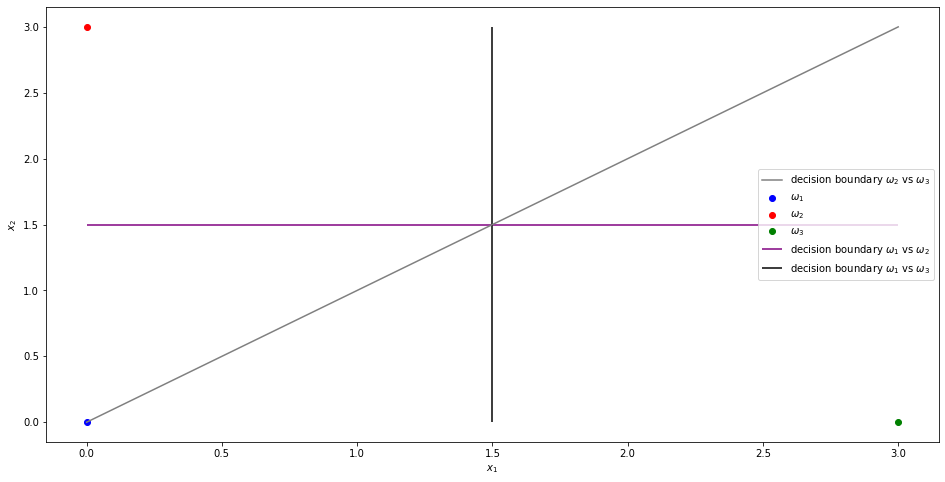

In [50]:
fig, axs = plt.subplots(figsize=(16,8))
means = np.row_stack([mu_1,mu_2,mu_3])
plt.scatter(means[0,0], means[0,1], label='$\omega_1$', color='blue')
plt.scatter(means[1,0], means[1,1], label='$\omega_2$', color='red')
plt.scatter(means[2,0], means[2,1], label='$\omega_3$', color='green')
plt.hlines(3/2,0,3, label = 'decision boundary $\omega_1$ vs $\omega_2$', color = 'purple')
plt.vlines(3/2,0,3, label = 'decision boundary $\omega_1$ vs $\omega_3$', color = 'black')
plt.plot(np.arange(0,4), np.arange(0,4), label = 'decision boundary $\omega_2$ vs $\omega_3$', color ='grey')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

## ii)
From i) we have that for $$P(\omega_1|x) = P(\omega_2|x) = P(\omega_3|x)$$
we ended up in $$ x_2 = \frac{3}{2}, x_1 = x_2$$

* The region where $x$ will be classified to $\omega_1$ is the region where $P(\omega_1|x) > P(\omega_2|x)$ and  $P(\omega_1|x) > P(\omega_3|x)$, thus $x_1 < \frac{3}{2}$ and $x_2 < \frac{3}{2}$

* In a similar fashion if $x_2 > \frac{3}{2} and x_1 < x_2$ then it belongs to $\omega_2$
* If $x_1 > \frac{3}{2} and x_1 > x_2$ then it belongs to $\omega_3$